In [13]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import pandas as pd
pd.set_option('display.max_colwidth',-1)

In [15]:
datapath = './RecommendationSystem/datasets/BX-CSV-Dump/'

In [16]:
books = pd.read_csv(datapath+'BX-Books.csv',error_bad_lines=False,encoding='latin-1',sep=';')
ratings = pd.read_csv(datapath+'BX-Book-Ratings.csv',error_bad_lines=False,encoding='latin-1',sep=';')
users = pd.read_csv(datapath+'BX-Users.csv',error_bad_lines=False,encoding='latin-1',sep=';')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [34]:
# Removing Unwanted Columns
removecols = list(books.columns[5:])
books.drop(columns=removecols,inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


## Peek at ratings

In [50]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [54]:
print("Shape is " + str(ratings.shape))
print("\n-------")
print(ratings.isna().sum())

Shape is (1149780, 3)

-------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [55]:
print('no na values')

no na values


## Peek at users

In [49]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [56]:
print("Shape is " + str(users.shape))
print("\n-------")
print(users.isna().sum())

Shape is (278858, 3)

-------
User-ID     0     
Location    0     
Age         110762
dtype: int64


In [74]:
users.Age.unique()

array([  nan,   18.,   17.,   61.,   26.,   14.,   25.,   19.,   46.,
         55.,   32.,   24.,   20.,   34.,   23.,   51.,   31.,   21.,
         44.,   30.,   57.,   43.,   37.,   41.,   54.,   42.,   50.,
         39.,   53.,   47.,   36.,   28.,   35.,   13.,   58.,   49.,
         38.,   45.,   62.,   63.,   27.,   33.,   29.,   66.,   40.,
         15.,   60.,    0.,   79.,   22.,   16.,   65.,   59.,   48.,
         72.,   56.,   67.,    1.,   80.,   52.,   69.,   71.,   73.,
         78.,    9.,   64.,  103.,  104.,   12.,   74.,   75.,  231.,
          3.,   76.,   83.,   68.,  119.,   11.,   77.,    2.,   70.,
         93.,    8.,    7.,    4.,   81.,  114.,  230.,  239.,   10.,
          5.,  148.,  151.,    6.,  101.,  201.,   96.,   84.,   82.,
         90.,  123.,  244.,  133.,   91.,  128.,   94.,   85.,  141.,
        110.,   97.,  219.,   86.,  124.,   92.,  175.,  172.,  209.,
        212.,  237.,   87.,  162.,  100.,  156.,  136.,   95.,   89.,
        106.,   99.,

In [67]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


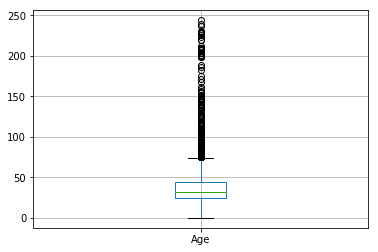

In [66]:
users.boxplot(column=['Age'])

In [59]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Since age contains non consistent data, we ignore as our feature

In [75]:
users.drop(columns=['Age'],inplace=True)

In [76]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [86]:
users.rename(columns={'User-ID':'userid','Location':'loc'},inplace=True)
users.head(1)

,userid,loc
0,1,"nyc, new york, usa"


In [91]:
users.userid.unique().shape

(278858,)

In [94]:
books.rename(columns={'ISBN':'isbn','Book-Title':'booktitle',
                      'Book-Author':'bookauthor','Year-Of-Publication':'yearofpublication',
                      'Publisher':'publisher'},inplace = True)
books.head(1)

,isbn,booktitle,bookauthor,yearofpublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


In [95]:
ratings.rename(columns={'User-ID':'userid','ISBN':'isbn','Book-Rating':'bookrating'},inplace=True)
ratings.head(1)

,userid,isbn,bookrating
0,276725,034545104X,0


## users(userid)->ratings(userid) (isbn)->books(isbn)

In [96]:
ratings.userid.unique().shape

(105283,)

In [108]:
ur = pd.merge(users,ratings,on=['userid'])

In [110]:
ur.head()

,userid,loc,isbn,bookrating
0,2,"stockton, california, usa",0195153448,0
1,7,"washington, dc, usa",034542252,0
2,8,"timmins, ontario, canada",0002005018,5
3,8,"timmins, ontario, canada",0060973129,0
4,8,"timmins, ontario, canada",0374157065,0


In [111]:
books.head(1)

,isbn,booktitle,bookauthor,yearofpublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press


In [114]:
data = pd.merge(ur,books,on = ['isbn'])

In [115]:
len(data)

1031136

In [118]:
data.dropna(inplace=True)

In [119]:
data.isna().sum()

userid               0
loc                  0
isbn                 0
bookrating           0
booktitle            0
bookauthor           0
yearofpublication    0
publisher            0
dtype: int64

In [120]:
data.head()

,userid,loc,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [128]:
len(data)

1031133

In [136]:
len(data[data['userid']==8])

17

## Getting count of user rating books

In [147]:
userbookcount = pd.DataFrame(data.groupby(['userid'])['bookrating'].count()).reset_index()

In [149]:
userbookcount.head()

,userid,bookrating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1


In [153]:
data.head()

,userid,loc,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [173]:
data['location'] = data['loc'].apply(lambda x:x.split(',')[-1].lstrip())
data.drop(columns=['loc'],inplace=True)

In [179]:
data = data[data['location']!='n/a']

In [181]:
len(data.location.unique())

287

In [171]:
##LOnger version
for i,row in data.iterrows():
    print(i)
    if i>3:
        break
    else:
        print(row['loc'].split(',')[-1].lstrip())

0
usa
1
canada
2
canada
3
n/a
4


In [169]:
a = 'adf'

## move ahead

In [189]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [209]:
x='1'

In [210]:
x.isdigit()

True

In [216]:
data['yearofpublication'] = data['yearofpublication'].apply(lambda x:x if type(data.yearofpublication) == int else None)

In [217]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,None,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,None,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,None,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,None,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,None,HarperFlamingo Canada,canada


In [193]:
for col in data.columns:
    print(col +' --- '+ str(givemeunique(col)))

userid --- 92101
isbn --- 270116
bookrating --- 11
booktitle --- 241041
bookauthor --- 101579
yearofpublication --- 202
publisher --- 16727
location --- 287


In [187]:
def givemeunique(x):
    return len(data[x].unique())

In [205]:
?data['yearofpublication'] = data.yearofpublication.astype('int')

In [196]:
sorted(data.bookrating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [198]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


## f(x) = [1,0,0,0,0,0,0,0,0]

In [197]:
pd.get_dummies(data.bookrating)

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,0
10,1,0,0,0,0,0,0,0,0,0,0
